I used Stack Overflow and YouTube Data Science tutorials  in some sections for help ❗

Importing of libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import numpy as np


Loading the dataset

In [ ]:
df = pd.read_csv('/content/adult.csv')
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Display info and check for missing values

In [ ]:
df.info()#displays information
df.isnull()#checks for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48838,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Checking for data types

In [ ]:
print(df.dtypes)

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object


In [ ]:
for i in df.dtypes:
  print(i)

int64
object
int64
object
int64
object
object
object
object
object
int64
int64
int64
object
object


In [ ]:
#df[['workclass','relationship']]

Encoding categorical data using LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
df_categorical = df[['education','marital-status','occupation','relationship','race','gender','native-country','income']]#categorical data only
df_categorical = df_categorical.apply(LabelEncoder().fit_transform)#categorical data gets changed to numerical data


Normalizing numerical columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols_to_normalize = ['age','fnlwgt','educational-num','capital-gain','capital-loss','hours-per-week']#numerical data
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.109589,Private,0.145129,11th,0.400000,Never-married,Machine-op-inspct,Own-child,Black,Male,0.000000,0.0,0.397959,United-States,<=50K
1,0.287671,Private,0.052451,HS-grad,0.533333,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.000000,0.0,0.500000,United-States,<=50K
2,0.150685,Local-gov,0.219649,Assoc-acdm,0.733333,Married-civ-spouse,Protective-serv,Husband,White,Male,0.000000,0.0,0.397959,United-States,>50K
3,0.369863,Private,0.100153,Some-college,0.600000,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0.076881,0.0,0.397959,United-States,>50K
4,0.013699,?,0.061708,Some-college,0.600000,Never-married,?,Own-child,White,Female,0.000000,0.0,0.295918,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.136986,Private,0.165763,Assoc-acdm,0.733333,Married-civ-spouse,Tech-support,Wife,White,Female,0.000000,0.0,0.377551,United-States,<=50K
48838,0.315068,Private,0.096129,HS-grad,0.533333,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.000000,0.0,0.397959,United-States,>50K
48839,0.561644,Private,0.094462,HS-grad,0.533333,Widowed,Adm-clerical,Unmarried,White,Female,0.000000,0.0,0.397959,United-States,<=50K
48840,0.068493,Private,0.128004,HS-grad,0.533333,Never-married,Adm-clerical,Own-child,White,Male,0.000000,0.0,0.193878,United-States,<=50K


Exploratory Data Analysis


*   Visualization of age, education and income using a bargraph



/tmp/ipython-input-2112113640.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='education', y='age', hue='income', data=df, ci=None, palette=['pink', 'deeppink'])#speififcation of x and y values and the colors for the graph


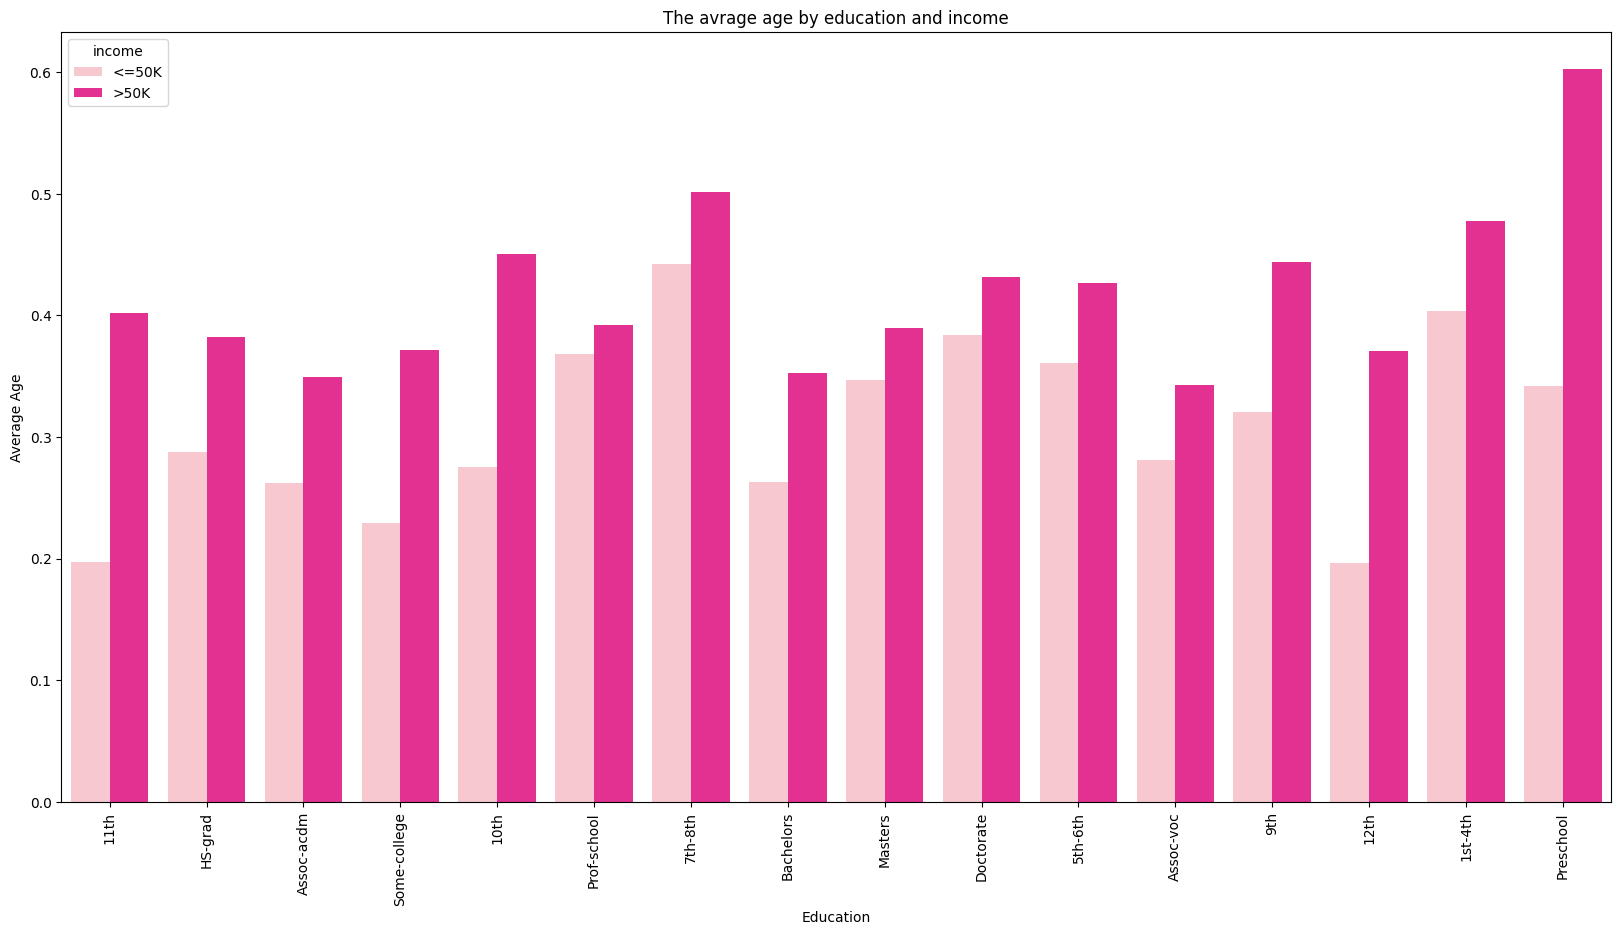

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(x='education', y='age', hue='income', data=df, ci=None, palette=['pink', 'deeppink'])#speififcation of x and y values and the colors for the graph
plt.xticks(rotation=90)
plt.title('The avrage age by education and income')#Heading of the graph
plt.xlabel('Education')#The x axis label
plt.ylabel('Average Age')#The y axis label
plt.show()#method that displays the graph
#we can also use plt.tight_layout for a better graph layout

Analyzing correlation between features using a heatmap

<Axes: >

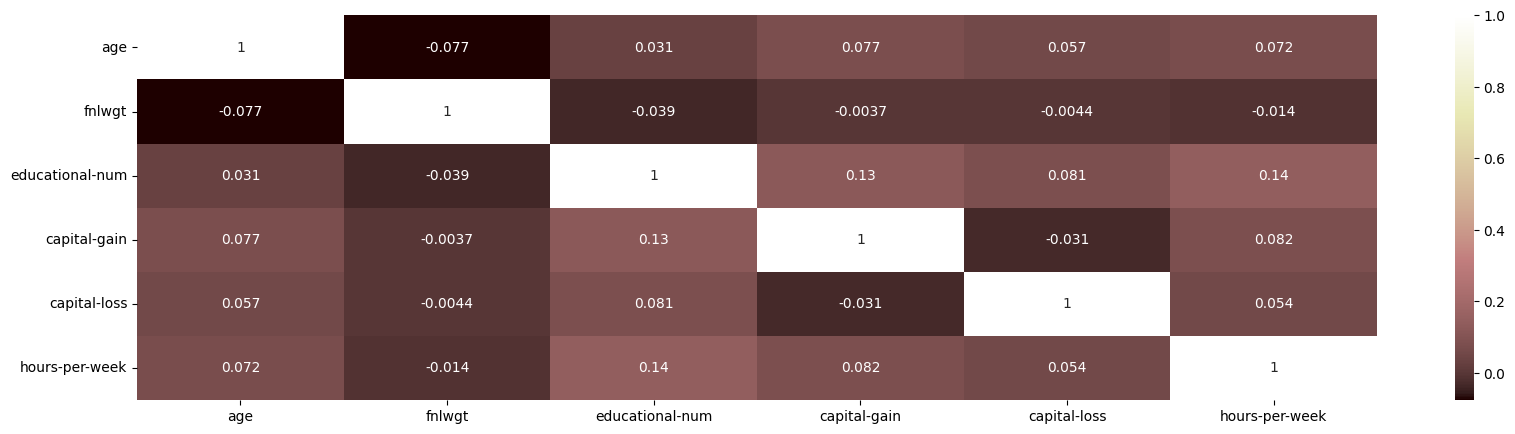

In [ ]:
num_cols=df.select_dtypes(include=['int64','float64']).columns#selects only numerical columns leaving out the categorical ones
plt.figure(figsize=(20,5))#specifying the figure size of the heatmap
sns.heatmap(df[num_cols].corr(),annot=True, cmap='pink')

Using a boxplot to find outliers in numerical features

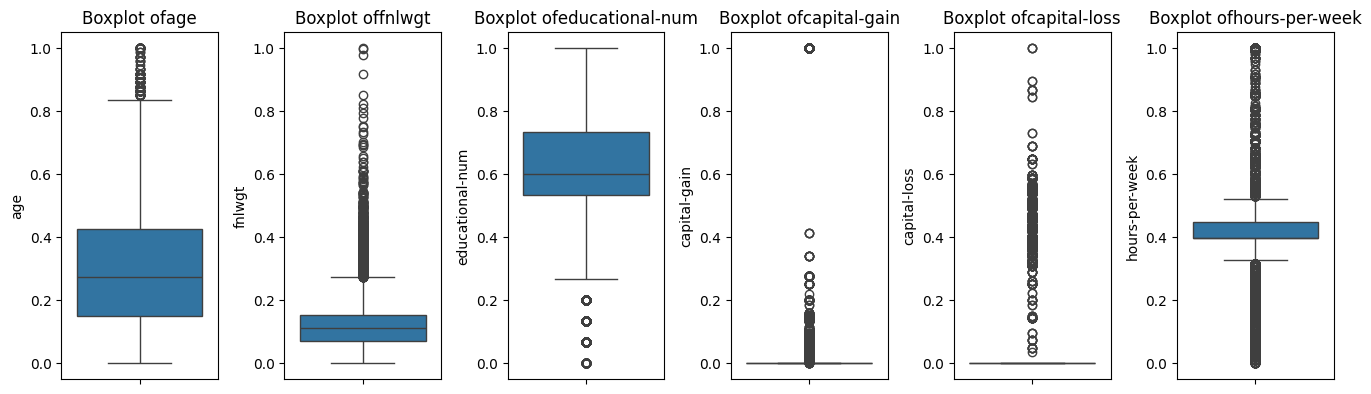

In [ ]:
num_cols= ['age','fnlwgt','educational-num','capital-gain','capital-loss','hours-per-week']
plt.figure(figsize=(18, 15))
for k,col in enumerate(num_cols):
  plt.subplot(4,8,k+1)
  sns.boxplot(y=df[col])
  plt.title(f'Boxplot of{col}')
  plt.tight_layout()#makes the visuals to appear nicely
plt.show()





Visualisation of income distribution across gender and education levels using a group plot

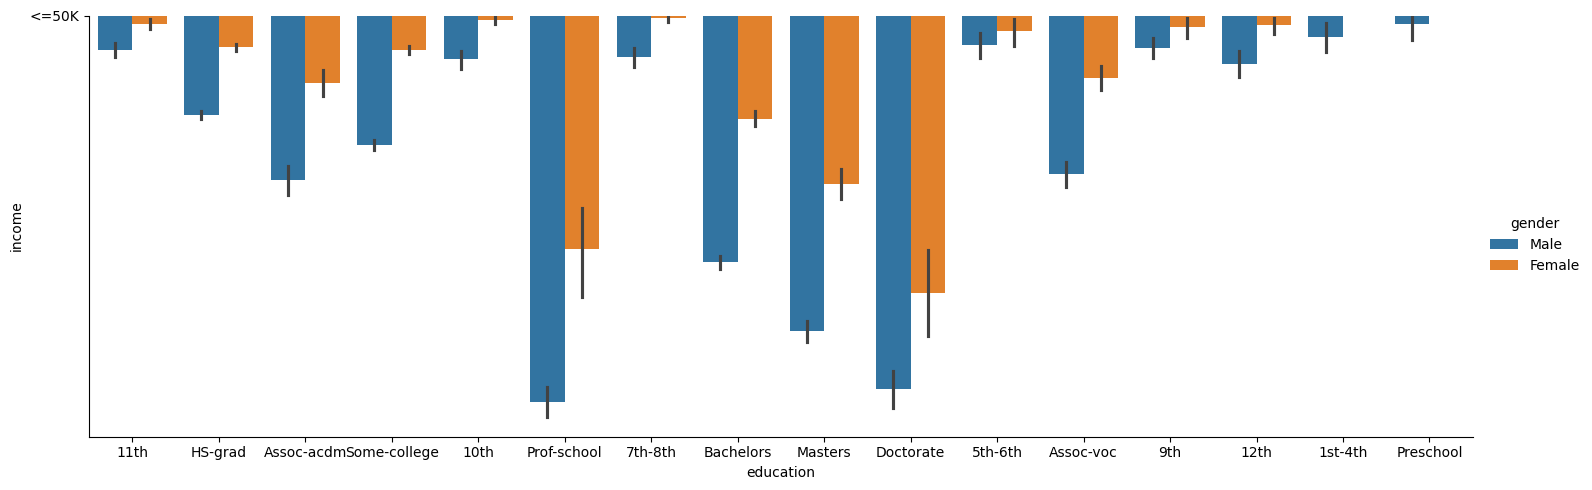

In [ ]:
sns.catplot(x='education',y='income',hue='gender',data=df, kind='bar',height=5,aspect=3)


Feature Engneering

Drropping highly collinear features

In [ ]:

numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr().abs()
upper_tri=corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop =[column for column in upper_tri.columns if any(upper_tri[column]> 0.8)]
df=df.drop(to_drop,axis=1)


Creation of new feature called age_group with labels

In [ ]:
df['age_group']= pd.cut(df['age'],bins=[0, 25, 45,65],labels=['Young', 'Adult', 'Senior'])

Using PCA to reduce dimensions and visualize with a scatter plot

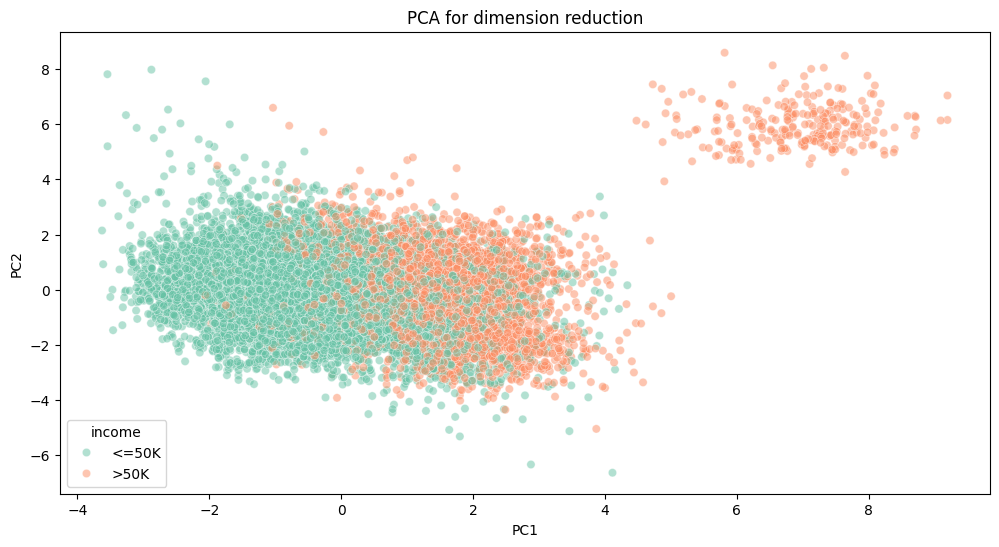

In [ ]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Selects numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
# Scales data before PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_cols])
# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['income'] = df['income']
# Scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='PC1', y='PC2', hue='income', data=pca_df, alpha=0.5, palette='Set2')
plt.title('PCA for dimension reduction')
plt.show()


Classification Models

Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(df,test_size = 0.2)#splitting data
df_train.shape


(39073, 16)

In [ ]:
df_test.shape

(9769, 16)

In [ ]:
df_train.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,age_group
20104,0.232877,Private,0.230651,Assoc-acdm,0.733333,Separated,Craft-repair,Not-in-family,White,Male,0.0,0.0,0.602041,United-States,<=50K,Young
2630,0.643836,Private,0.150384,Some-college,0.600000,Married-civ-spouse,Adm-clerical,Husband,White,Male,0.0,0.0,0.397959,United-States,<=50K,Young
43344,0.287671,Private,0.193866,HS-grad,0.533333,Divorced,Adm-clerical,Own-child,White,Female,0.0,0.0,0.397959,United-States,<=50K,Young
32517,0.136986,Private,0.311062,Assoc-voc,0.666667,Never-married,Machine-op-inspct,Not-in-family,White,Male,0.0,0.0,0.397959,United-States,<=50K,Young
14696,0.109589,Private,0.125407,HS-grad,0.533333,Never-married,Sales,Unmarried,White,Female,0.0,0.0,0.397959,United-States,<=50K,Young


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(df,test_size = 0.2) #splitting data
df_train.shape
df_test.shape
df_train.head()
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['income'])
X_train = df_train.drop('income', axis=1)
y_train = df_train['income']
X_test = df_test.drop('income', axis=1)
y_test = df_test['income']
#hot encoding
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(max_iter=2000, solver='lbfgs')
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("Precision:", round(precision_score(y_test, y_pred, pos_label='>50K'),2))#ROUNDED OFF TO TWO DECIMALS
print("Recall:", round(recall_score(y_test, y_pred, pos_label='>50K'),2))
print("F1-Score:", round(f1_score(y_test, y_pred, pos_label='>50K'),2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.854
Precision: 0.741
Recall: 0.598
F1-Score: 0.662
Confusion Matrix:
 [[6943  488]
 [ 941 1397]]


DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix
decision_model = DecisionTreeClassifier(max_depth=6,random_state=40)
decision_model.fit(X_train,y_train)
y_pred = decision_model.predict(X_test)
print("Accuracy:", round(accuracy_score(y_test, y_pred),2))#round off value to two decimals
print("Precision:", round(precision_score(y_test, y_pred, pos_label='>50K'),2))
print("Recall:", round(recall_score(y_test, y_pred,pos_label='>50K'),2))
print("F1-Score:", round(f1_score(y_test, y_pred,pos_label='>50K'),2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.86
Precision: 0.82
Recall: 0.52
F1-Score: 0.64
Confusion Matrix:
 [[7159  272]
 [1120 1218]]


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("Precision:", round(precision_score(y_test, y_pred, pos_label='>50K'),2))
print("Recall:", round(recall_score(y_test, y_pred, pos_label='>50K'),2))
print("F1-Score:", round(f1_score(y_test, y_pred, pos_label='>50K'),2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.859
Precision: 0.744
Recall: 0.629
F1-Score: 0.682
Confusion Matrix:
 [[6925  506]
 [ 868 1470]]


Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred = svm_model.predict(X_test_scaled)
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("Precision:", round(precision_score(y_test, y_pred, pos_label='>50K'), 3))
print("Recall:", round(recall_score(y_test, y_pred, pos_label='>50K'), 3))
print("F1-Score:", round(f1_score(y_test, y_pred, pos_label='>50K'), 3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.854
Precision: 0.748
Recall: 0.585
F1-Score: 0.657
Confusion Matrix:
 [[6970  461]
 [ 970 1368]]


 ROC CURVE and AUC calculation

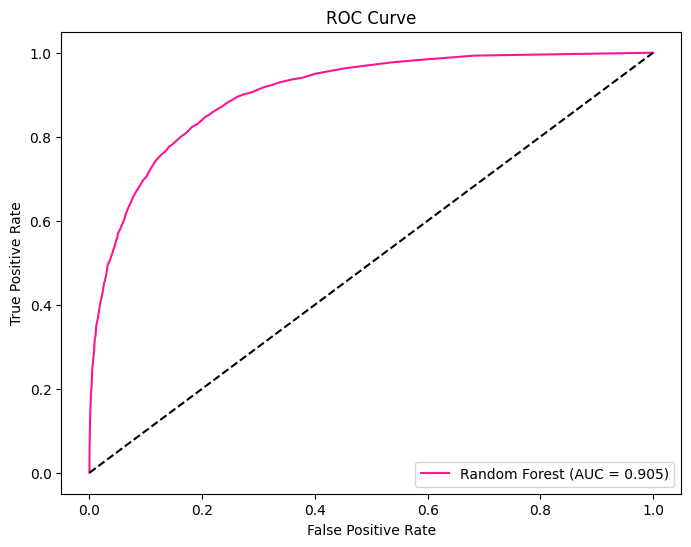

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_probs = rf_model.predict_probability(X_test)[:,1]
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_probs)#fpr and tpr are false positive and true positive rate
auc_score = roc_auc_score(y_test_encoded,y_probs)
# Plotting of ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc_score:.3f})', color='deeppink')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()



In [ ]:
print("Hello Lebohang!")

Hello Lebohang!


Comparison between Logistic Regression model and Random Forest

* When it comes to accuracy the difference is not huge but the Random Forest is more accurate than the Logistic Regression model.
*  In terms of the confusion matrix, the Random Forest has less false negatives and more true postives.
*   F1 score balances precison and recall. The F1 score of the Random Forest is higher than the one of the Logistic Regression model.




BEST MODEL

From the model comparison, the best suited model is the Random Forest model because of it's high accuracy, precision and recall. It provides better overall performance.

Income Prediction

In [ ]:
# Sample provided
sample = {
    'age': 37,
    'workclass': 'Private',
    'education': 'Bachelors',
    'marital-status': 'Married-civ-spouse',
    'occupation': 'Exec-managerial',
    'relationship': 'Husband',
    'race': 'White',
    'sex': 'Male',
    'capital-gain': 0,
    'capital-loss': 0,
    'hours-per-week': 60,
    'native-country': 'United-States'
}
# Converting the sample to a data frame
sample_df = pd.DataFrame([sample])
sample_encoded = pd.get_dummies(sample_df, drop_first=True)
sample_encoded = sample_encoded.reindex(columns=X_train.columns, fill_value=0)
# Prediction using the Random Forest model
prediction = rf_model.predict(sample_encoded)[0]
print(f"Predicted income for the sample: {prediction}")


Predicted income for the sample: <=50K
